In [1]:
#pip install numpy
#pip install matplotlib
#pip install scipy
import numpy as math
import random as random
from scipy import signal 
import matplotlib.pyplot as plt
def MYfilter(b,a,t,data):
    f_x = [0 for i in range(len(b))]
    f_y = [0 for i in range(len(a))]
    for i in range(len(data)-1):
        f_x.append(data[i])
        left  = sum([b[j] * f_x[-j] for j in range(len(b))]);
        right = sum([a[j] * f_y[-j] for j in range(1, len(a))]);
        f_y.append((left - right) / a[0])
    t=math.linspace(t[0], t[-1], len(t)+len(a)-1)
    return t, f_y
# исходный сигнал
sig2 = lambda t: math.cos(t)
# исходный сигнал с помехами
sig3 = lambda t: sig2(t)+math.random.uniform(0,0.08,len(t))

In [5]:
# ФИЛЬТР
#   Передаточная функция
W_s = lambda s: (0.0815*(1+2*(s**(-1))+(s**(-2))))/(1-1.0308*(s**(-1))+0.3553*(s**(-2)))
W_jw = lambda w: W_s(1j*w)
#   Коэффициенты
b = math.array([0.0815,0.163,0.0815])
a = math.array([1,-1.0308,0.3553])
plt.rcParams['figure.dpi'] = 200

\begin{align}
W(s)=\frac{0.0815*{(1+2*(s^{-1})+(s^{-2}))}}{1-1.0308*(s^{-1})+0.3553*(s^{-2})}
\end{align}

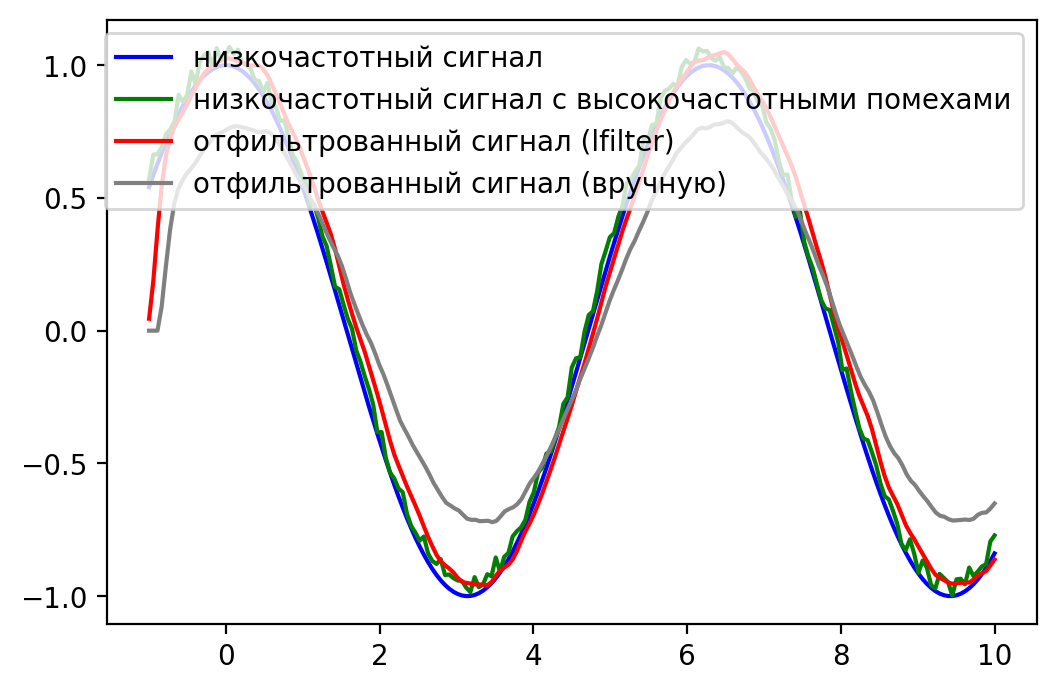

In [6]:

# массив равномерно распределенный от А до Б с кол-вом элементов = С
t = math.linspace(-1, 10, 201)

# построение неизмененного и измененного сигнала
plt.plot(t, sig2(t),color="blue")
plt.plot(t, sig3(t),color="green")
data = sig3(t)
out = signal.lfilter(b,a,data,axis=0)
lll,out2 = MYfilter(b,a,t,data)
plt.plot(t, out, color="red" )
plt.plot(lll, out2, color="gray" )
plt.subplots_adjust(bottom=0.157)
plt.legend(["низкочастотный сигнал", "низкочастотный сигнал с высокочастотными помехами", "отфильтрованный сигнал (lfilter)", "отфильтрованный сигнал (вручную)"],loc='upper right',bbox_to_anchor=(1, 0.01));
plt.show()

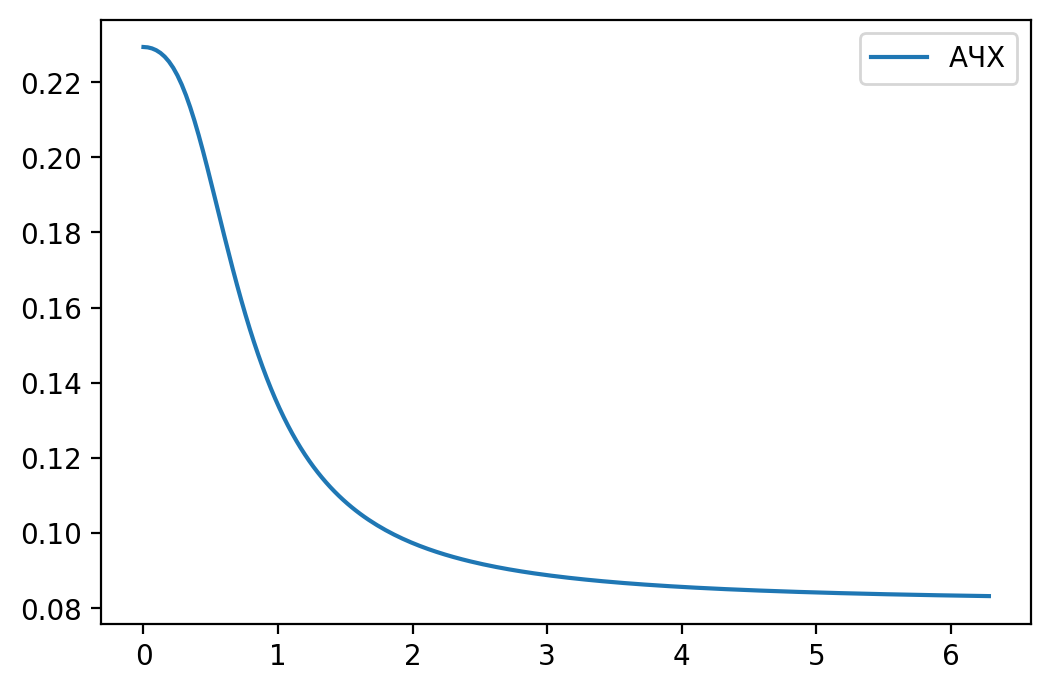

In [4]:
# построение АЧХ фильтра
w = math.linspace(0.0001, 2*math.pi,200)
plt.plot(w, (abs(W_jw(w))))
plt.legend(["АЧХ"],loc='upper right');
plt.show()